
1. Có tổng bao nhiêu giao dịch, sản phẩm và khách hàng khác nhau?
+ Đáp án: (25900, 4070, 4372)
2. Tỉ lệ khách hàng có thông tin
+ Đáp án: 24.93%
3. Đâu là nước có số lượng đơn hàng (Quantity) nhiều thứ 3?
+ Đáp án: Germany
4. Từ nào xuất hiện ít nhất trong phần Description?
5. Sản phẩm nào bán được số lượng (Quantity) lớn nhất ở United Kingdom?

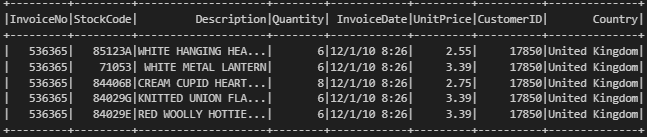

In [14]:
ss.stop()

### read data

In [1]:
from pyspark.sql import SparkSession

In [2]:
from pyspark.sql.window import *
python_round = round
from pyspark.sql.functions import *
spark_round = round

In [3]:
ss = SparkSession.builder \
    .appName("bai 1") \
    .master("local[*]") \
    .getOrCreate()

In [4]:
retail_df = ss.read.csv("D:/Python/2024/test_hadoop/hoc_spark/baiTap/bai1/retails.csv", header=True, inferSchema=False)

### info

In [12]:
retail_df.describe().show(5)

+-------+------------------+------------------+--------------------+-----------------+-------------+-----------------+------------------+-----------+
|summary|         InvoiceNo|         StockCode|         Description|         Quantity|  InvoiceDate|        UnitPrice|        CustomerID|    Country|
+-------+------------------+------------------+--------------------+-----------------+-------------+-----------------+------------------+-----------+
|  count|            541909|            541909|              540455|           541909|       541909|           541909|            406829|     541909|
|   mean|  559965.752026781|27623.240210938104|             20713.0| 9.55224954743324|         NULL|  4.6111136260883|15287.690570239585|       NULL|
| stddev|13428.417280798483|16799.737628427683|                NULL|218.0811578502346|         NULL|96.75985306117995|1713.6003033215989|       NULL|
|    min|            536365|             10002| 4 PURPLE FLOCK D...|               -1|1/10/11 10:04|

In [13]:
retail_df.info()

AttributeError: 'DataFrame' object has no attribute 'info'

### 1. Tong bao nhieu giao dich, san pham va khach hang khac nhau

In [34]:
tong_khach_hang_khac_nhau = retail_df.select("CustomerID").distinct().count()
tong_giao_dich_khac_nhau = retail_df.select("InvoiceNo").distinct().count()
tong_san_pham_khac_nhau = retail_df.select("StockCode").distinct().count()

In [5]:
# cach khac dung drop duplicates
tong_khach_hang_khac_nhau_2 = retail_df.dropDuplicates(["CustomerID"]).select("CustomerID").count()
print(tong_khach_hang_khac_nhau_2)

4373


In [35]:
print("Tong khach hang khac nhau la: ", tong_khach_hang_khac_nhau,
      "\nTong giao dich khac nhau la: ", tong_giao_dich_khac_nhau,
      "\nTong san pham khac nhau la: ", tong_san_pham_khac_nhau)

Tong khach hang khac nhau la:  4373 
Tong giao dich khac nhau la:  25900 
Tong san pham khac nhau la:  4070


### 2. Tỉ lệ khách hàng có thông tin
+ Đáp án: 24.93%

In [9]:
num_khach_null = retail_df.filter(retail_df["CustomerID"].isNull()).count()
print(num_khach_null)

135080


In [10]:
num_khach_not_null = retail_df.filter(retail_df["CustomerID"].isNotNull()).select("CustomerID").distinct().count()
print(num_khach_not_null)

4372


In [14]:
print(f"Ty le khach hang co thong tin la: {python_round(num_khach_not_null/num_khach_null*100, 2)}%")


Ty le khach hang co thong tin la: 3.24%


### 3. Đâu là nước có số lượng đơn hàng (Quantity) nhiều thứ 3?
+ Đáp án: Germany

In [6]:
don_hang_theo_quoc_gia_window = Window.partitionBy("Country")

In [7]:
tong_don_hang_theo_quoc_gia_df = retail_df.withColumn("tong_don_hang", sum(retail_df["Quantity"]).over(don_hang_theo_quoc_gia_window))

In [8]:
tong_don_hang_theo_quoc_gia_df = tong_don_hang_theo_quoc_gia_df.dropDuplicates(["Country"])

In [10]:
#cach 0:
tong_don_hang_theo_quoc_gia_df.orderBy(desc("tong_don_hang")).head(3)[2][7]

'EIRE'

In [24]:
#cach 1:
sort_don_hang_theo_quoc_gia_window = Window.orderBy(desc("tong_don_hang"))
rank_don_hang_theo_quoc_gia_df = tong_don_hang_theo_quoc_gia_df.withColumn("rank_don_hang_theo_quoc_gia", row_number().over(sort_don_hang_theo_quoc_gia_window))
rank_don_hang_theo_quoc_gia_df.show()

+---------+---------+--------------------+--------+--------------+---------+----------+---------------+-------------+---------------------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|        Country|tong_don_hang|rank_don_hang_theo_quoc_gia|
+---------+---------+--------------------+--------+--------------+---------+----------+---------------+-------------+---------------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|  12/1/10 8:26|     2.55|     17850| United Kingdom|    4263829.0|                          1|
|   536403|    22867|HAND WARMER BIRD ...|      96| 12/1/10 11:27|     1.85|     12791|    Netherlands|     200128.0|                          2|
|   536540|    22968|ROSE COTTAGE KEEP...|       4| 12/1/10 14:05|     9.95|     14911|           EIRE|     142637.0|                          3|
|   536527|    22809|SET OF 6 T-LIGHTS...|       6| 12/1/10 13:04|     2.95|     12662|        Germany|     117448.0|       

In [25]:
rank_don_hang_theo_quoc_gia_df.filter(rank_don_hang_theo_quoc_gia_df["rank_don_hang_theo_quoc_gia"] == 3).show()

+---------+---------+--------------------+--------+-------------+---------+----------+-------+-------------+---------------------------+
|InvoiceNo|StockCode|         Description|Quantity|  InvoiceDate|UnitPrice|CustomerID|Country|tong_don_hang|rank_don_hang_theo_quoc_gia|
+---------+---------+--------------------+--------+-------------+---------+----------+-------+-------------+---------------------------+
|   536540|    22968|ROSE COTTAGE KEEP...|       4|12/1/10 14:05|     9.95|     14911|   EIRE|     142637.0|                          3|
+---------+---------+--------------------+--------+-------------+---------+----------+-------+-------------+---------------------------+



In [31]:
#cach 2:
tong_don_hang_theo_quoc_gia_df.orderBy(desc("tong_don_hang")).limit(3).collect()[2]

Row(InvoiceNo='536540', StockCode='22968', Description='ROSE COTTAGE KEEPSAKE BOX ', Quantity='4', InvoiceDate='12/1/10 14:05', UnitPrice='9.95', CustomerID='14911', Country='EIRE', tong_don_hang=142637.0)


In [32]:
#dep hon:
tong_don_hang_theo_quoc_gia_df.orderBy(desc("tong_don_hang")).limit(3).orderBy("tong_don_hang").show(1)

+---------+---------+--------------------+--------+-------------+---------+----------+-------+-------------+
|InvoiceNo|StockCode|         Description|Quantity|  InvoiceDate|UnitPrice|CustomerID|Country|tong_don_hang|
+---------+---------+--------------------+--------+-------------+---------+----------+-------+-------------+
|   536540|    22968|ROSE COTTAGE KEEP...|       4|12/1/10 14:05|     9.95|     14911|   EIRE|     142637.0|
+---------+---------+--------------------+--------+-------------+---------+----------+-------+-------------+
only showing top 1 row



### 4. Từ nào xuất hiện ít nhất trong phần Description?

In [42]:
# explode() nhan vao cot(cac hang cua cot la cac mang), tra ve cot(moi hang cua cot la mot phan tu trong mang)
# split(column, ky tu phan tach)
word_group = retail_df.select(explode(split(retail_df["Description"], " ")).alias("word")).groupBy(["word"]).count()


+-----------+-----+
|       word|count|
+-----------+-----+
|        BOX|24403|
|   SHOULDER| 1610|
|        OWL| 2099|
|       CARS| 1197|
|     LITTLE|  587|
|       S/15|   64|
|     BADGES|  485|
|       JADE|   42|
|   SOMBRERO|   61|
|      SAVOY|   66|
|       BAND|   61|
|         LT|   15|
|   BIRTHDAY| 6123|
|CANDLESTICK|  336|
|    DOILIES| 2561|
|       TAGS| 1387|
|   SPORTING|  214|
|      ""J""|   41|
|     BEWARE|  458|
|     ISLAND|  286|
+-----------+-----+
only showing top 20 rows



In [49]:
word_group.filter(word_group["count"] == 1).show()

+---------------+-----+
|           word|count|
+---------------+-----+
|      LOVEHEART|    1|
|          Given|    1|
|           1.8M|    1|
|          WRAPS|    1|
|          ?lost|    1|
|             re|    1|
|samples/damages|    1|
|            sit|    1|
|            6's|    1|
|         BANNER|    1|
|           Ipod|    1|
|damages/display|    1|
|            fix|    1|
|     CAKESTAND,|    1|
|            OOH|    1|
|    made-thrown|    1|
|          sell.|    1|
|        OPULENT|    1|
|             be|    1|
|        cracked|    1|
+---------------+-----+
only showing top 20 rows



### 5. Sản phẩm nào bán được số lượng (Quantity) lớn nhất ở United Kingdom?

In [54]:
temp_retail_df = retail_df.withColumn("Quantity", retail_df["Quantity"].cast("int"))

In [59]:
temp_retail_df.groupBy("Country").max("Quantity").filter(temp_retail_df["Country"] == "United Kingdom").show()

+--------------+-------------+
|       Country|max(Quantity)|
+--------------+-------------+
|United Kingdom|        80995|
+--------------+-------------+



In [61]:
ss.stop()